# test de validation

In [1]:
%matplotlib inline
import os
import json

os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [8]:
def ocr_treatment(img_path):
	doc = DocumentFile.from_images(img_path)
	predictor = ocr_predictor('linknet_resnet18', pretrained=True, assume_straight_pages=False, preserve_aspect_ratio=True, det_bs=4, reco_bs=1024)
	result = predictor(doc)
	return result

def ocr_display(result):
	synthetic_pages = result.synthesize()
	plt.figure(figsize=(15, 15))
	plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()
	
	
def extract_text_blocks(json_data):
    text_blocks = []
    for page in json_data["pages"]:
        for block in page["blocks"]:
            text = ""
            for line in block["lines"]:
                for word in line["words"]:
                    text += word["value"] + " "
            text_blocks.append(text.strip())
    return text_blocks


def ocr_display_text(result):
	json_data = result.export()
	text_blocks = extract_text_blocks(json_data)
	for i, block in enumerate(text_blocks, start=1):
		print(f"Block {i}: {block}")
	
	
def save_json(result, file_name='result'):
	with open(file_name + '.json', 'w') as f:
		f.write(json.dumps(result.export()))
	
	
def save_txt(result, file_name='result'):
	with open(file_name + '.txt', 'w') as f:
		f.write(result.render())

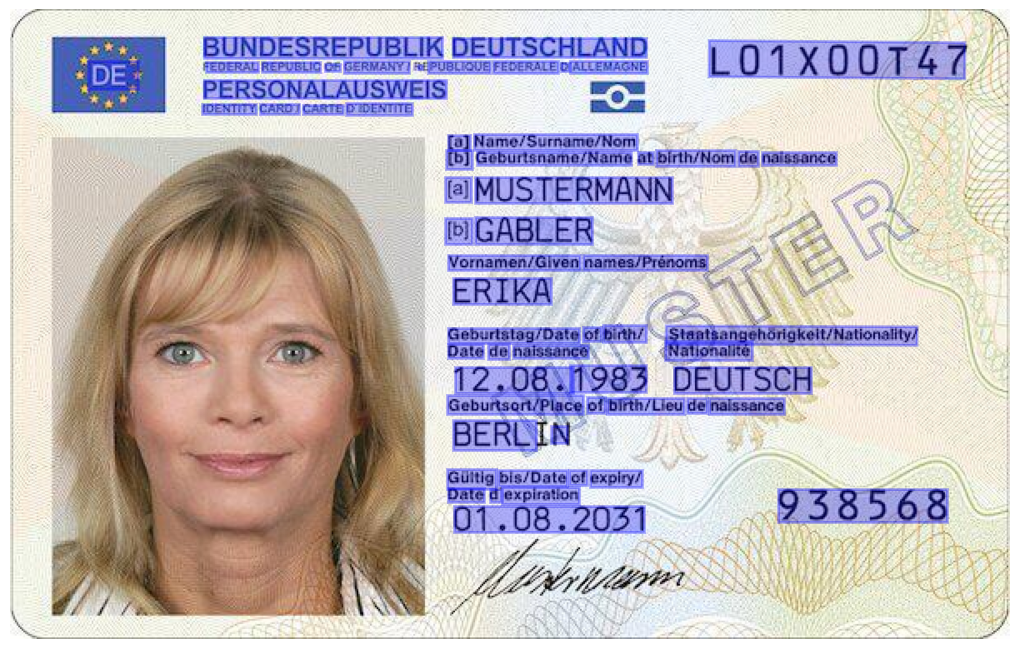

Block 1: BUNDESREPUBLIK DEUTSCHLAND EDENAL MEPUBLC 9 ANVNSD - PUBLIQUE FEDERALE a 3NDVWETV.
Block 2: L01X0OT47
Block 3: DE
Block 4: PERSONALALAUSWEIS IDENEY CAROI CARTE DIDENTITE
Block 5: [a) Name/Surname/Nom
Block 6: [q] Geburtsname/Name at birth/Nom de naissance
Block 7: (a) MUSTERMANN [ql GABLER
Block 8: Vornamen/Given names/Prénoms
Block 9: ERIKA
Block 10: Geburtstag/Date of birth/ AMPUOReN/INOgyebuegens
Block 11: Date de naissance
Block 12: Nationalité
Block 13: 12.08. 1983 DEUTSCH Geburtsen/Place of birth/Lieu de naissance
Block 14: BERL N
Block 15: Gultig bis/Date of expiry/ Date P expiration 01.08.2031
Block 16: 938568


In [10]:
img_path = 'img02.jpg'
result = ocr_treatment(img_path)
result.show()
#ocr_display(result)
ocr_display_text(result)
save_txt(result)
#save_json(result)